### Import modules

In [9]:
# get zoom-able notebook; must be called before importing the module
%matplotlib notebook 
# IPython extension to autoreload modules
%load_ext autoreload 
# 2 = reload all modules every time before executing the Python code typed
%autoreload 2 

import seapy
import scipy

import numpy as np
from numpy_groupies import aggregate # https://github.com/ml31415/numpy-groupies

# Note that splitting up matplotlib importation between cells can cause plots to not appear!
import matplotlib as mpl
import matplotlib.dates as dates
from matplotlib.dates import num2date, date2num, datetime
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from matplotlib.path import Path
from mpl_toolkits.basemap import Basemap


import os 
import sys
sys.path.append(os.path.abspath('/share/frinkraid3/lindsayv/lhw/'))
import pickle # object hierarchy converted into character stream, which contains all info needed to reconstruct object elsewhere

from math import ceil, floor # https://www.geeksforgeeks.org/floor-ceil-function-python/
import netCDF4
from netCDF4 import Dataset
from gridgeo import GridGeo
import cartopy.crs as ccrs
from cartopy.feature import COLORS, NaturalEarthFeature

''' 
The following functions are from Lisa's notebook and are not applicable
to my work without extensive editing, but bookmarking here anyway:

from RBF_Functions import load_roms, coord_dist

from ExtractSSTshipboard_functions import defineCompLocs, addCompLocs
from Compare_ROMS_CTD_Scenarios import scenarioLabeling, ROMSind4Path, mean4path, surface_val, vert_mean, surface_diff, makePlots 

from dateutil.relativedelta import relativedelta
'''

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


" \nThe following functions are from Lisa's notebook and are not applicable\nto my work without extensive editing, but bookmarking here anyway:\n\nfrom RBF_Functions import load_roms, coord_dist\n\nfrom ExtractSSTshipboard_functions import defineCompLocs, addCompLocs\nfrom Compare_ROMS_CTD_Scenarios import scenarioLabeling, ROMSind4Path, mean4path, surface_val, vert_mean, surface_diff, makePlots \n\nfrom dateutil.relativedelta import relativedelta\n"

## Plotting protocol

/share/apps/miniconda3/envs/frinkiac/lib/python3.6/site-packages/seapy-0.4.2-py3.6-linux-x86_64.egg/seapy/model/grid.py:456: UserWarning: could not compute grid depths.
  warn("could not compute grid depths.")
/share/apps/miniconda3/envs/frinkiac/lib/python3.6/site-packages/seapy-0.4.2-py3.6-linux-x86_64.egg/seapy/model/grid.py:507: UserWarning: could not compute grid thicknesses.
  warn("could not compute grid thicknesses.")


<IPython.core.display.Javascript object>


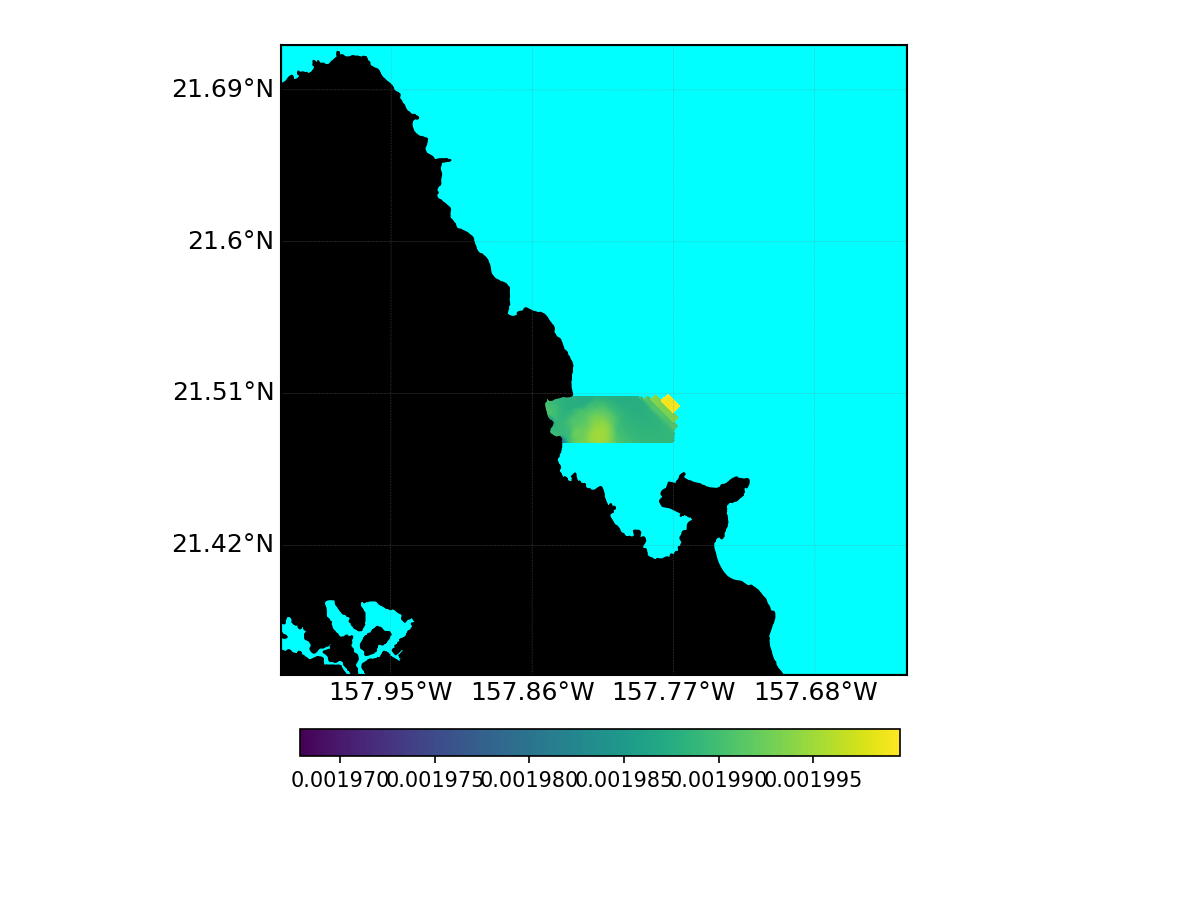

/share/apps/miniconda3/envs/frinkiac/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/share/apps/miniconda3/envs/frinkiac/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


In [12]:
grid = seapy.model.asgrid('/share/frinkraid3/lindsayv/Manuscript/NB_test.nc')
nc = seapy.netcdf('/share/frinkraid3/lindsayv/Manuscript/NB_test.nc')
t = nc.variables['dic'][20,5,:,:] 
# t.all
#[changes scale and tickmark delineations- depth?, 
# changes color scale (-1 shows nearly no variation; 0 shows some..seems to vary nonsensically..) ]
mb = seapy.hawaii(grid)
mb.pcolormesh(grid.lon_rho, grid.lat_rho, t)
mb.land()
mb.colorbar()
plt.show()

/share/apps/miniconda3/envs/frinkiac/lib/python3.6/site-packages/seapy-0.4.2-py3.6-linux-x86_64.egg/seapy/model/grid.py:456: UserWarning: could not compute grid depths.
  warn("could not compute grid depths.")
/share/apps/miniconda3/envs/frinkiac/lib/python3.6/site-packages/seapy-0.4.2-py3.6-linux-x86_64.egg/seapy/model/grid.py:507: UserWarning: could not compute grid thicknesses.
  warn("could not compute grid thicknesses.")


<IPython.core.display.Javascript object>


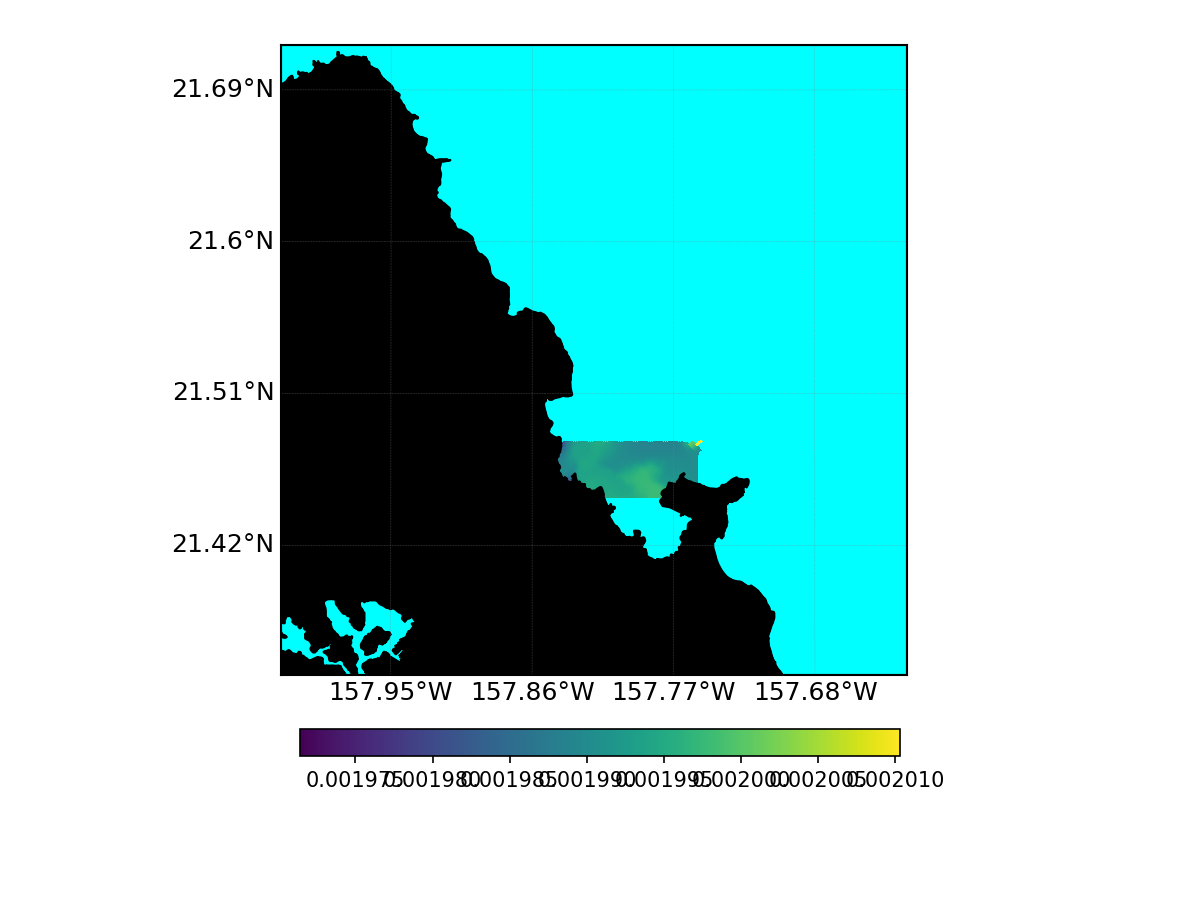

/share/apps/miniconda3/envs/frinkiac/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/share/apps/miniconda3/envs/frinkiac/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


In [11]:
grid = seapy.model.asgrid('/share/frinkraid3/lindsayv/Manuscript/CB_test.nc')
nc = seapy.netcdf('/share/frinkraid3/lindsayv/Manuscript/CB_test.nc')
t = nc.variables['dic'][20,5,:,:] 
# t.all
#[changes scale and tickmark delineations- depth?, 
# changes color scale (-1 shows nearly no variation; 0 shows some..seems to vary nonsensically..) ]
mb = seapy.hawaii(grid)
mb.pcolormesh(grid.lon_rho, grid.lat_rho, t)
mb.land()
mb.colorbar()
plt.show()

/share/apps/miniconda3/envs/frinkiac/lib/python3.6/site-packages/seapy-0.4.2-py3.6-linux-x86_64.egg/seapy/model/grid.py:456: UserWarning: could not compute grid depths.
  warn("could not compute grid depths.")
/share/apps/miniconda3/envs/frinkiac/lib/python3.6/site-packages/seapy-0.4.2-py3.6-linux-x86_64.egg/seapy/model/grid.py:507: UserWarning: could not compute grid thicknesses.
  warn("could not compute grid thicknesses.")


<IPython.core.display.Javascript object>


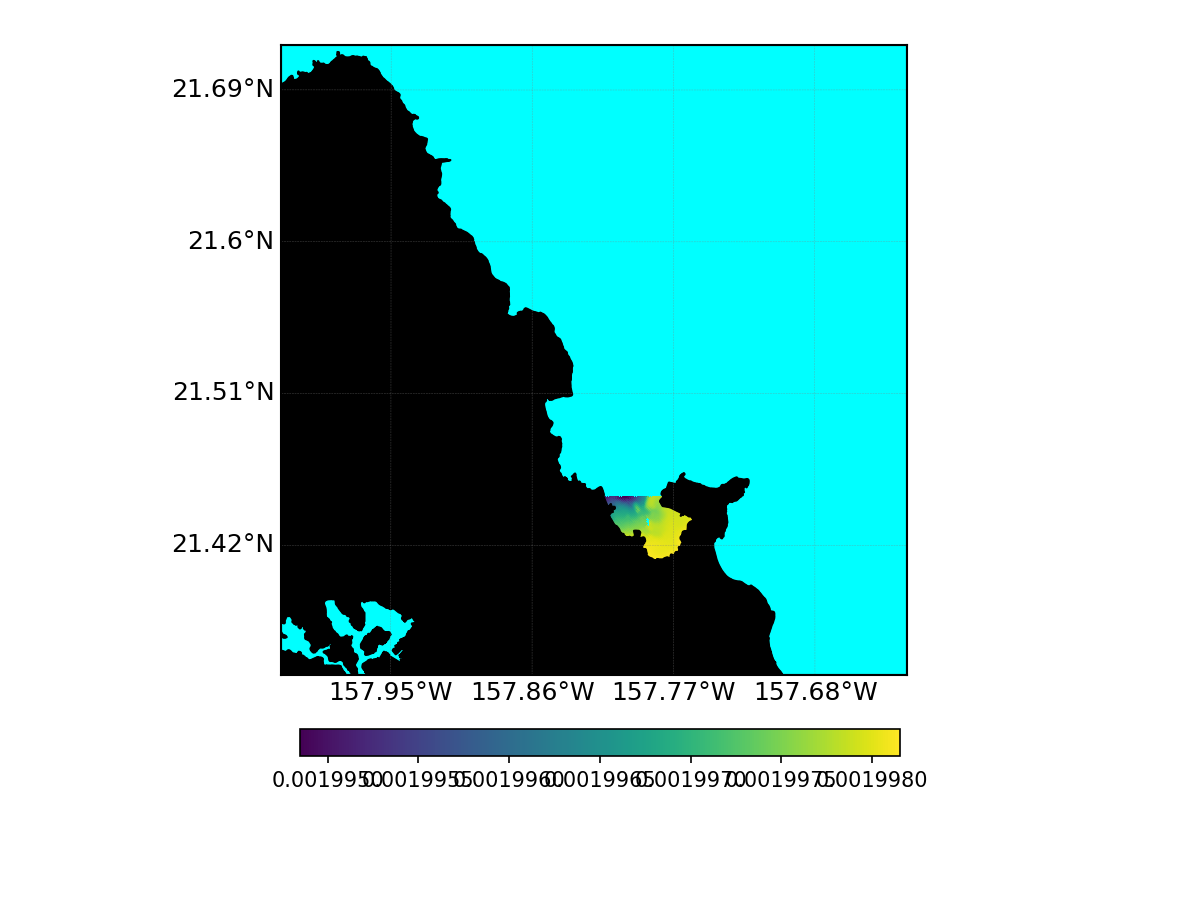

/share/apps/miniconda3/envs/frinkiac/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/share/apps/miniconda3/envs/frinkiac/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


In [8]:
grid = seapy.model.asgrid('/share/frinkraid3/lindsayv/Manuscript/SB_test.nc')
nc = seapy.netcdf('/share/frinkraid3/lindsayv/Manuscript/SB_test.nc')
t = nc.variables['dic'][20,5,:,:] 
mb = seapy.hawaii(grid)
mb.pcolormesh(grid.lon_rho, grid.lat_rho, t)
mb.land()
mb.colorbar()
plt.show()

(90, 190) (90, 190)
(30, 20, 90, 190)
(30,)


<IPython.core.display.Javascript object>


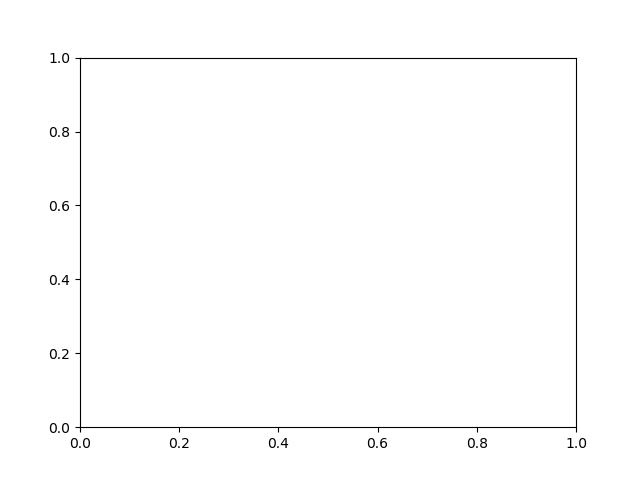

TypeError: Illegal arguments to pcolormesh; see help(pcolormesh)

In [6]:


grid = seapy.netcdf('/share/frinkraid3/lindsayv/hioekg-template/output/hioekg_his_04840.nc')
lon = grid.variables['lon_rho'][:]
lat = grid.variables['lat_rho'][:]
print(lon.shape, lat.shape)
alk = grid.variables['ldop']
print(alk.shape)
alk_t = np.sum(grid.variables['alk'][:],axis=(1,2,3))
print(alk_t.shape)
'''
From the seapy.hawaii.pcolormesh documentation: 

m=seapy.hawaii()
m.pcolormesh(grid.lon_rho,grid.lat_rho, data )
m.land()

seapy.hawaii.pcolormesh(self, lon, lat, data, **kwargs)
pcolor requires a modification to the locations to line up with the geography
        dlon = lon * 0
        dlat = lat * 0
        dlon[:, 0:-1] = lon[:, 1:] - lon[:, 0:-1]
        dlat[0:-1, :] = lat[1:, :] - lat[0:-1, :]
        x, y = self.basemap(lon - dlon * 0.5, lat - dlat * 0.5)
        self.pc = self.ax.pcolormesh(x, y, data, **kwargs)
'''

plt.pcolormesh(grid, alk_t.shape) # "Illegal arguments"
plt.grid()

### Method 2: seapy.netcdf to grab COBALT file, seapy.model.asgrid to grab grid file

In [ ]:
# Notes
roms_file = '/share/frinkraid3/lindsayv/hioekg-template/output_semi_daily/hioekg_his_04840.nc'
grid = seapy.model.asgrid(roms_file)



In [52]:
roms_file = '/share/frinkraid3/lindsayv/hioekg-template/output_semi_daily/hioekg_his_04840.nc'
nc = seapy.netcdf(roms_file)
grid_file = '/share/frinkraid3/lindsayv/hioekg-template/ncfiles/hioekg-grid.nc'

temp = nc.variables['temp'][:]

lon = grid.lon_rho[:]
nt = temp.shape[0]
mask = seapy.adddim(seapy.adddim(grid.mask_rho,25),nt)
temp = np.ma.masked_equal(temp*mask,0)
heat = np.zeros((nt,grid.mask_rho.shape[0],grid.mask_rho.shape[1]))

thick = grid.thick_rho

for t in range(nt):
    heat[t,:] = np.sum(temp[t,:]*thick,0)
    
temp_mean = np.zeros((nt,grid.mask_rho.shape[0],grid.mask_rho.shape[1]))
for t in range(nt):
    temp_mean[t,:] = seapy.roms.analysis.depth_average(temp[t,:],grid,1000)
plt.figure()
plt.pcolormesh(temp_mean[0,:]-temp_mean[-1,:])
plt.colorbar()
    

ValueError: operands could not be broadcast together with shapes (30,20,90,190) (30,25,90,190) 

### Method 3: Basemap module
##### Adapted from: 
http://joehamman.com/2013/10/12/plotting-netCDF-data-with-Python/

https://matplotlib.org/basemap/users/examples.html

Start by opening the file that contains the variables we want to plot. 
**fh** becomes the file handle of the open netCDF file, and **r** denotes that we want to open the file in read only mode.

In [54]:
grid_file = '/share/frinkraid3/lindsayv/hioekg-template/output/hioekg_his_04840.nc'
fh = Dataset(grid_file, mode='r')

Now we can read the data from any of the variables contained in fh. 
Let's read the coordinate variables (lat, lon) and the alkalnity variable. This puts each of these variables into numpy arrays.

In [55]:
lons = fh.variables['lon_rho'][:]
lats = fh.variables['lat_rho'][:]
s_rho = fh.variables['s_rho'][:]
alk = fh.variables['alk'][:]

alk_units = fh.variables['alk'].units

In [56]:
print(lons.shape)
# np.set_printoptions(threshold=sys.maxsize)

(90, 190)


Close the file:

In [57]:
fh.close()

The data is now in numpy arrays, so we can move forward, using Python and Matplotlib to plot our data.
We will set up a Basemap instance, specifying our desired map and projection settings.

In [50]:
??Basemap()

<IPython.core.display.Javascript object>


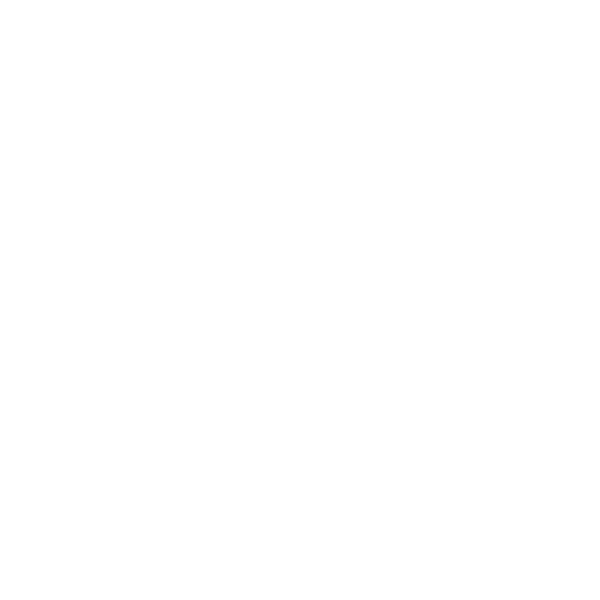

AttributeError: type object 'map' has no attribute 'drawcoastlines'

In [58]:
# Get some parameters for the projection
lon_0 = lons.mean()
lat_0 = lats.mean()
lon_min = lons.min()
lon_max = lons.max()
lat_min = lats.min()
lat_max = lats.max()

# Set up figure
fig = plt.figure(figsize = (6,6))

# Set up map projection with perspective of satellite looking down at 21.48N, 157.8W.
# Use low resolution coastlines.
map.drawcoastlines(linewidth = 1)
map = Basemap(projection='ortho',lat_0=lat_0,lon_0=lon_0,resolution='h')

xmin, ymin = map(lon_min, lat_min)
xmax, ymax = map(lon_max, lat_max)

ax = plt.gca() # creates appropriate axes

ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

# Add Title
plt.title('Kaneohe Bay COBALT basemap')
plt.show()

When we give this Basemap instance our coordinate variables, it returns our plotting coordinates. 
This is how basemap knows where to put our projected data on the map.

### Bookmarked functions/workflows- from Lisa's work

In [7]:
# See functions in initial cell
# ...TBA